**Problem Statement:** We are given a dataset that contains weights and sizes of Apples and Oranges. We have to classify this data such that given the weight and size of a new fruit, we should predict whether it's an apple or an orange. In this notebook we will apply Logistic Regression for this classification.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Importing the dataset
dataset = pd.read_csv('apples_and_oranges.csv')

In [3]:
# Looking through the dataset
dataset

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


We can observe that there are no missing values.

In [4]:
# No. of rows and columns
dataset.shape

(40, 3)

In [5]:
# No. of apples and oranges
dataset['Class'].value_counts()

orange    20
apple     20
Name: Class, dtype: int64

## Encoding Target

In [6]:
le = LabelEncoder()

In [9]:
dataset['Class'] = le.fit_transform(dataset['Class'])
dataset['Class']

0     1
1     1
2     1
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    0
15    1
16    1
17    0
18    1
19    0
20    1
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    0
29    0
30    0
31    1
32    0
33    0
34    1
35    1
36    1
37    0
38    0
39    0
Name: Class, dtype: int64

In [8]:
le.classes_

array(['apple', 'orange'], dtype=object)

This implies that,<br>
0 represents Apple<br>
1 represents Orange

In [10]:
# Looking at the dataset again
dataset.head()

,Weight,Size,Class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1


## Plotting the dataset

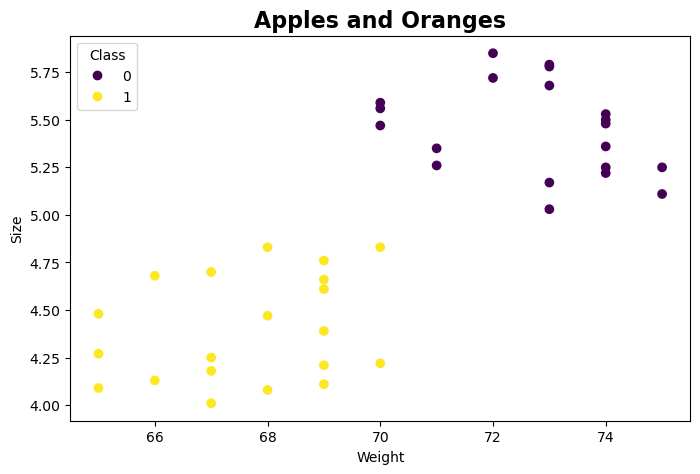

In [15]:
plt.figure(figsize=(8, 5))
plt.title('Apples and Oranges', fontweight='bold', fontsize=16)
plt.xlabel('Weight')
plt.ylabel('Size')
scatter = plt.scatter(dataset['Weight'], dataset['Size'], c=dataset['Class'], cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.show()

We can observe that oranges have lower weight and size compared to apples. Further by drawing a straight line between these two groups of data points, we can clearly distinguish between apples and oranges.

## Logistic Regression

As we can clearly distinguish between apples and oranges using a straight line decision boundary, we can choose the hypothesis *y = a0 + a1 * x1 + a2 * x2* for Logistic Regression<br>
where,<br>
*a0*, *a1*, *a2* are the fitting parameters<br>
*x1* is Weight<br>
*x2* is Size

In [16]:
# Defining target and features
y = dataset['Class']
x = dataset.drop(columns=['Class'])

In [17]:
# Creating object of LogisticRegression class
log_reg = LogisticRegression()

In [18]:
# Fitting parameters
log_reg.fit(x,y)

LogisticRegression()

In [19]:
# Intercept - a0
log_reg.intercept_

array([106.60060152])

In [20]:
# Coefficients - a1, a2 respectively
log_reg.coef_

array([[-1.42830506, -1.31284213]])

In [21]:
# Predicting labels for the given dataset
label_predictions = log_reg.predict(x)

## Decision Boundary

In [22]:
# Parameter values
a0 = log_reg.intercept_[0]
a1 = log_reg.coef_[0][0]
a2 = log_reg.coef_[0][1]

In [23]:
# Defining x1 and x2 values for decision boundary
x1 = np.array([69, 71])   # trial and error values to get the appropriate values for creating a boundary
x2 = (-a0 - (a1 * x1)) / a2

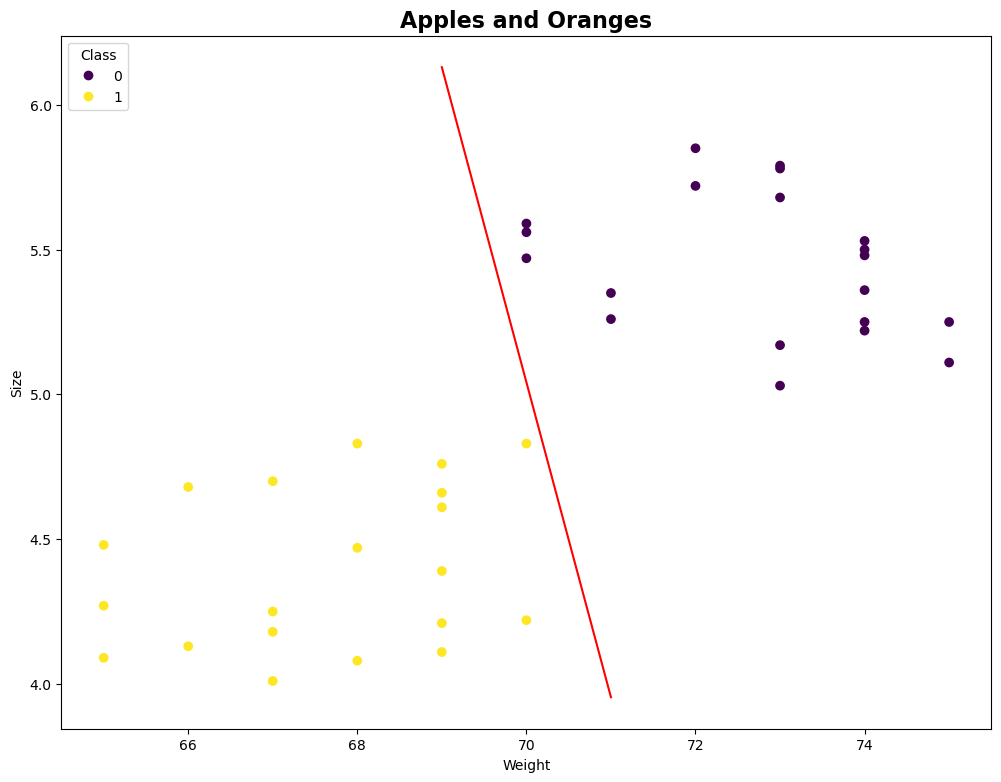

In [24]:
# Plotting the decision boundary
plt.figure(figsize=(12,9))
plt.title('Apples and Oranges', fontweight='bold', fontsize=16)
plt.xlabel('Weight')
plt.ylabel('Size')
scatter = plt.scatter(dataset['Weight'], dataset['Size'], c=dataset['Class'], cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.show()

We can observe that the red line which represents the decision boundary clearly separates apples and oranges. On the left we have oranges and on the right we have apples.

## Accuracy score

In [25]:
accuracy_score(y, label_predictions)

1.0

## Confusion Matrix

In [26]:
cm = confusion_matrix(y, label_predictions)
cm

array([[20,  0],
       [ 0, 20]], dtype=int64)

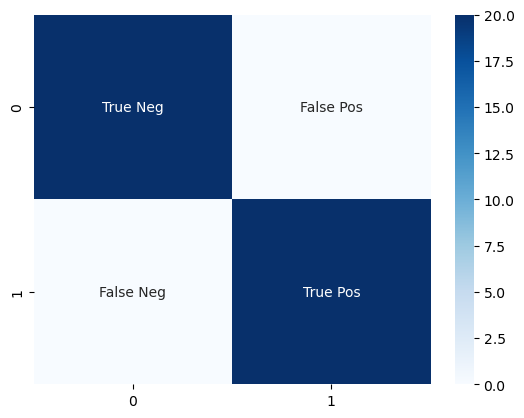

In [27]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()